### Basic code for monitoring training curves
* Built a simple TrainingMonitor class in training_monitor.py
* It's a basic interface for writing and reading training loss stats as the simulation progresses
* Data is represented in Pandas DataFrames, and for now is stored on the disk as csv files
* I may turn this into a SQLLite database at some point because it's more flexible. However, this means you'll no longer just be able to read the files by eye or with very simple code. Will think about whether it's worth it.


TODO
* Additional functions for visualising and analysing the curves
* Simple notebook to do this
* At some point, will also want an interactive tool?
* Add in additional metrics:
    * Training loss as well as validation?
    * Loss breakdowns (by feature, time etc.)
    * Attention?
    * MCD
    * ASR metrics

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
os.chdir('/home/ubuntu/msc-project-master/msc-project-master/')

In [3]:
os.getcwd()

'/home/ubuntu/msc-project-master/msc-project-master'

In [84]:
import training_monitor as tm

### Initial dev

In [11]:
t = tm.TrainingMonitor('my_test.csv', exp_name='my_exp', b_append=True, path="test")

In [12]:
t

,epoch,update_time,train_loss,valid_loss


In [16]:
t.insert(5, valid_loss=5.5)
t.insert(10, valid_loss=7)
t.insert(1, valid_loss=3.8)

In [17]:
t.write()

In [18]:
t.read()
t

,epoch,update_time,train_loss,valid_loss
0,1,02-Jul-2018 16:36:10,NaN,3.8
1,5,02-Jul-2018 16:36:10,NaN,5.5
2,10,02-Jul-2018 16:36:10,NaN,7.0


### Check on training log producing by sim

In [6]:
t = tm.TrainingMonitor('vctk-us-train-mon.csv', exp_name='vctk-us-train-mon', path="training_logs")
t.read()
#t.disp()

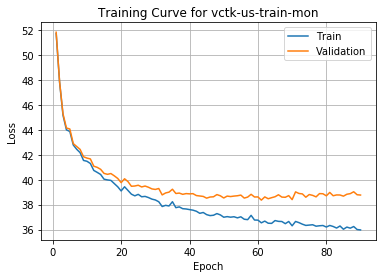

In [7]:
t.plot()

In [12]:
ls = tm.LossDecomposition(t)

In [13]:
loss_contrib = ls.get_loss_contrib(4)

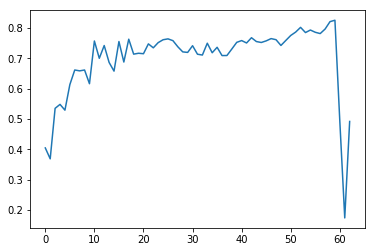

In [14]:
plt.plot(loss_contrib.sum((0,1)))

In [15]:
ls.load_all_loss_contribs()

In [16]:
loss_by_feature = ls.get_loss_by_feature()

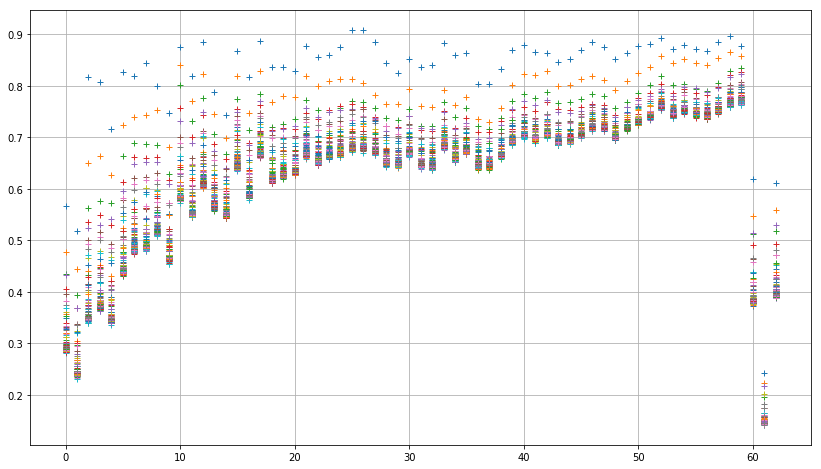

In [21]:
plt.figure(figsize=(14,8))
plt.plot(loss_by_feature.transpose(), linestyle="None", marker="+")
plt.grid(True)
#plt.legend(ls.all_loss_epochs)
plt.show()

### Phase 2

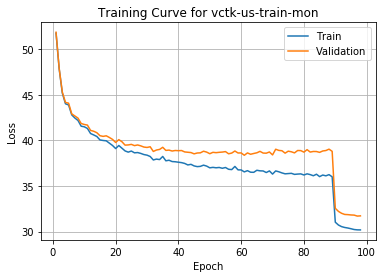

In [48]:
t = tm.TrainingMonitor('vctk-us-train-mon.csv', exp_name='vctk-us-train-mon', path="training_logs")
t.read()
t.plot()

### VCTK-all

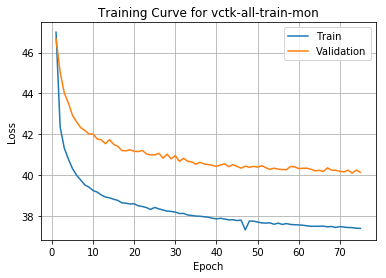

In [7]:
t = tm.TrainingMonitor('vctk-all-train-mon.csv', exp_name='vctk-all-train-mon', path="training_logs")
t.read()
t.plot()

In [43]:
ls = tm.LossDecomposition(t)

In [44]:
ls.load_all_loss_contribs()
loss_by_feature = ls.get_loss_by_feature()

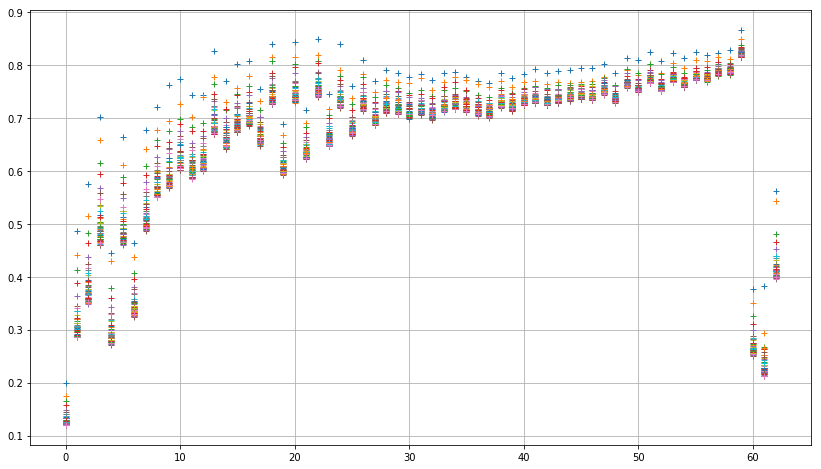

In [45]:
plt.figure(figsize=(14,8))
plt.plot(loss_by_feature.transpose(), linestyle="None", marker="+")
plt.grid(True)
#plt.legend(ls.all_loss_epochs)
plt.show()

### vctk-us-train-mon-mcd

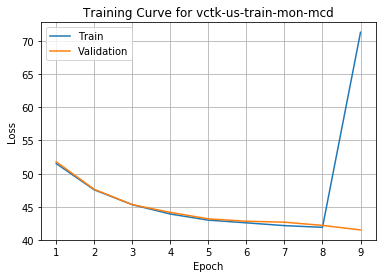

In [27]:
t = tm.TrainingMonitor('vctk-us-train-mon-mcd.csv', exp_name='vctk-us-train-mon-mcd', path="training_logs")
t.read()
t.plot()

In [28]:
t.disp()

,epoch,update_time,train_loss,valid_loss,mcd
0,1.0,05-Jul-2018 11:55:06,51.523521,51.795788,9.663568
1,2.0,05-Jul-2018 12:01:32,47.576319,47.648936,8.563579
2,3.0,05-Jul-2018 12:07:47,45.335492,45.338031,8.255662
3,4.0,05-Jul-2018 12:14:03,43.929134,44.180010,8.078120
4,5.0,05-Jul-2018 12:20:20,43.009736,43.203468,7.625696
5,6.0,05-Jul-2018 12:26:34,42.601907,42.842641,7.598790
6,7.0,05-Jul-2018 12:32:50,42.184700,42.702383,7.493384
7,8.0,05-Jul-2018 12:39:10,41.926199,42.216983,7.339984
8,9.0,05-Jul-2018 12:55:38,71.274071,41.538555,15.378649


## Big Run Over Weekend: 06-Jul-17
* Aim to run a full, clean vctk-all sim with logged losses etc. for write-up

In [ ]:
python train.py --data=/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all --nspk=107 --expName=vctk-all --noise 4 --seq-len 100 --epochs 90



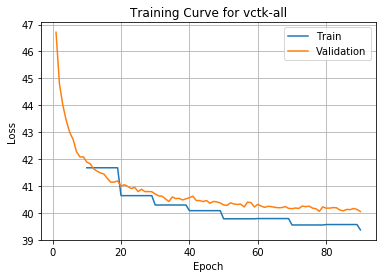

In [86]:
tm_phase_one = tm.TrainingMonitor('vctk-all.csv', exp_name='vctk-all', path="training_logs")
tm_phase_one.read()
tm_phase_one.plot()

In [65]:
tm_phase_one.disp(b_show_all=True)

,epoch,update_time,train_loss,valid_loss,mcd
0,1.0,06-Jul-2018 21:48:36,NaN,46.712190,NaN
1,2.0,06-Jul-2018 22:16:47,NaN,44.789036,NaN
2,3.0,06-Jul-2018 22:44:55,NaN,43.992648,NaN
3,4.0,06-Jul-2018 23:14:12,NaN,43.424401,NaN
4,5.0,06-Jul-2018 23:42:34,NaN,42.988889,NaN
5,6.0,07-Jul-2018 00:10:55,NaN,42.725274,NaN
6,7.0,07-Jul-2018 00:38:48,NaN,42.266756,NaN
7,8.0,07-Jul-2018 01:07:30,NaN,42.075240,NaN
8,9.0,07-Jul-2018 01:36:24,NaN,42.080471,NaN
9,10.0,07-Jul-2018 02:11:03,41.674166,41.882917,6.229821


In [ ]:
python train.py --data=/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all --nspk=107 --expName=vctk-all-2 --noise 2 --seq-len 400 --epochs 90 --checkpoint checkpoints/vctk-all/bestmodel.pth

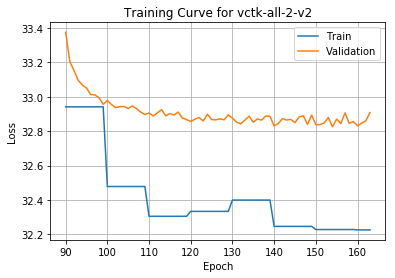

In [87]:
tm_phase_two = tm.TrainingMonitor('vctk-all-2-v2.csv', exp_name='vctk-all-2-v2', path="training_logs")
tm_phase_two.read()
tm_phase_two.plot()

In [70]:
#tm_phase_two.disp(b_show_all=True)

Killed vctk-all-2-v2 at 10:03 16-Jul-18 because it had been running for ages with no improvement, and it was hogging all the memory

Now combine the two segments together...

In [140]:
tm_combo = tm_phase_one.combine(tm_phase_two, 'vctk-all-combo')

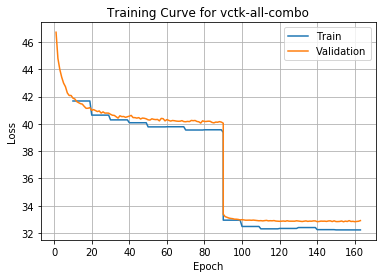

In [142]:
tm_combo.plot()

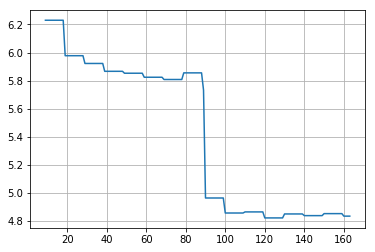

In [150]:
plt.plot(tm_combo.data['mcd'].fillna(method='ffill'))
plt.grid(True)
plt.show()

### Recomputing vctk-all using eval_curves

 ```python
 calc_eval_curves(checkpoint_folder='checkpoints/vctk-all',
                     data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                     speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                     speaker_recognition_exp_name='notebook_test',
                     exp_name='vctk_all_recompute_20180716',
                     max_seq_len=1000,
                     nspk=107,
                     gpu=0,
                     batch_size=64,
                     seed=1,
                     eval_epochs=20,
                     b_teacher_force=True,
                     b_use_train_noise=True,
                     start_epoch=1,
                     end_epoch=90,
                     step_epoch=5
                     )
 ```

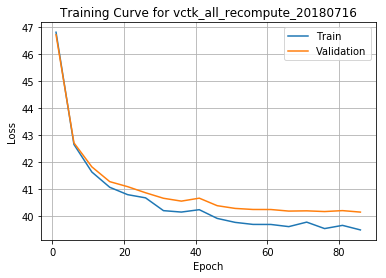

In [165]:
tm_recalc_phase_one = tm.TrainingMonitor('vctk_all_recompute_20180716.csv', exp_name='vctk_all_recompute_20180716', path="training_logs")
tm_recalc_phase_one.read()
tm_recalc_phase_one.plot()

In [166]:
tm_recalc_phase_one.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval
0,1,16-Jul-2018 14:09:18,46.802265,46.710810,NaN,0.986071
1,6,16-Jul-2018 14:11:45,42.644263,42.702364,NaN,0.991595
2,11,16-Jul-2018 14:14:08,41.622966,41.813641,NaN,0.991114
3,16,16-Jul-2018 14:16:33,41.056485,41.265729,NaN,0.995437
4,21,16-Jul-2018 14:18:56,40.783525,41.079637,NaN,0.994717
5,26,16-Jul-2018 14:21:20,40.665311,40.853966,NaN,0.993996
6,31,16-Jul-2018 14:23:49,40.190975,40.649730,NaN,0.993516
7,36,16-Jul-2018 14:26:17,40.138514,40.543990,NaN,0.994717
8,41,16-Jul-2018 14:28:46,40.226424,40.653681,NaN,0.990154
9,46,16-Jul-2018 14:31:12,39.903780,40.375318,NaN,0.996398


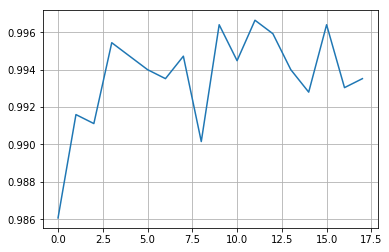

In [167]:
tm_recalc_phase_one.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

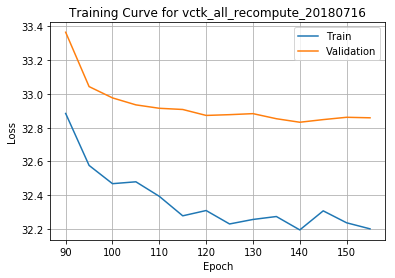

In [168]:
tm_recalc_phase_two = tm.TrainingMonitor('vctk_all_2_v2_recompute_20180716.csv', exp_name='vctk_all_recompute_20180716', path="training_logs")
tm_recalc_phase_two.read()
tm_recalc_phase_two.plot()

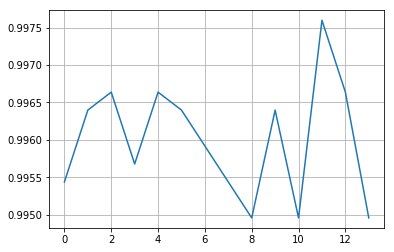

In [170]:
tm_recalc_phase_two.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

In [171]:
tm_recalc_combo = tm_recalc_phase_one.combine(tm_recalc_phase_two, 'vctk-all-recalc-combo')

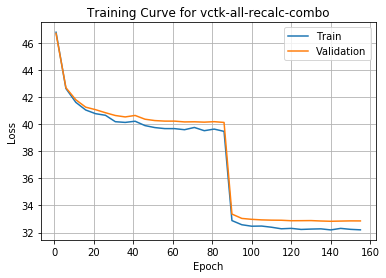

In [172]:
tm_recalc_combo.plot()

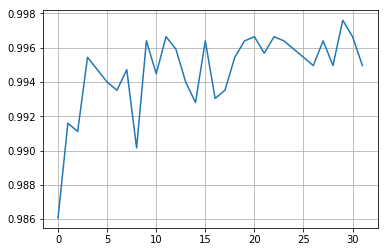

In [176]:
tm_recalc_combo.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

### Recomputing vckt-all curves
* Overnight 16-Jul-18
* More detail
* With and without teacher forcing/noise

In [505]:
tm_recalc_combo_TT = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachT_noiseT.csv', exp_name='vctk_all_20180716_teachT_noiseT', path="training_logs",
                                        source_file=('vctk_all_20180716_teachT_noiseT.csv', 'vctk_all_2_v2_20180716_teachT_noiseT.csv'))

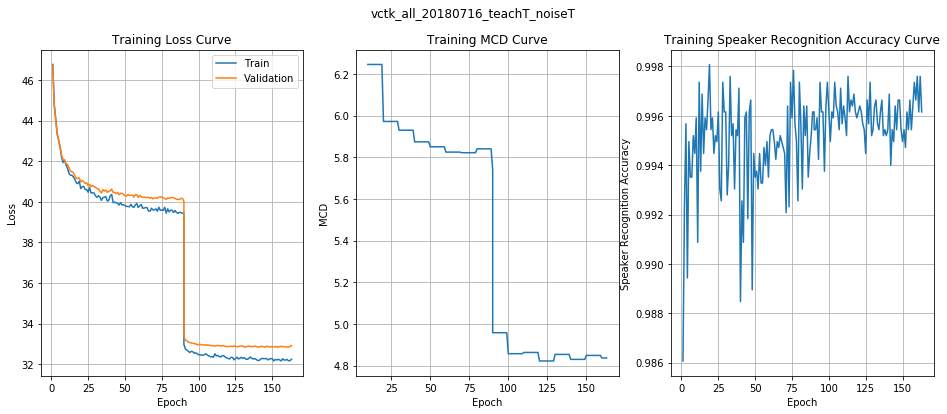

In [506]:
tm_recalc_combo_TT.plot()

In [530]:
tm_recalc_combo_FF = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachF_noiseF.csv', exp_name='vctk_all_20180716_teachT_noiseT', path="training_logs",
                                        source_file=('vctk_all_20180716_teachF_noiseF.csv', 'vctk_all_2_v2_20180716_teachF_noiseF.csv'))

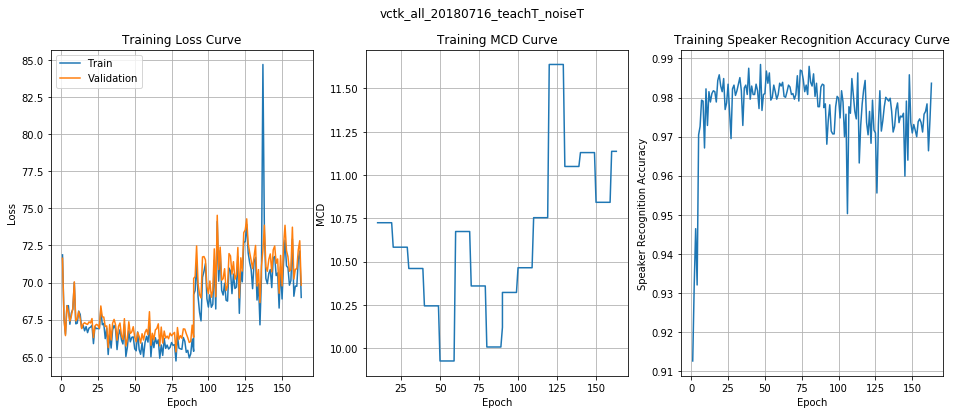

In [531]:
tm_recalc_combo_FF.plot()

In [523]:
l = tm.LossDecomposition(tm_recalc_combo_FF)

In [524]:
out = l.get_loss_by_feature()

Done 10
Done 20
Done 30
Done 40
Done 50
Done 60
Done 70
Done 80
Done 90
Done 90
Done 100
Done 110
Done 120


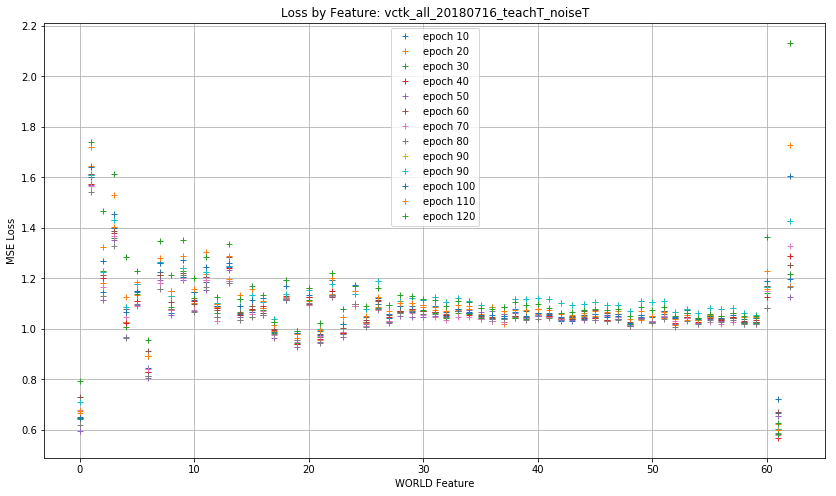

In [525]:
l.plot_loss_by_feature()

In [238]:
lc10 = l.get_loss_contrib(epoch=10)
lc20 = l.get_loss_contrib(epoch=20)

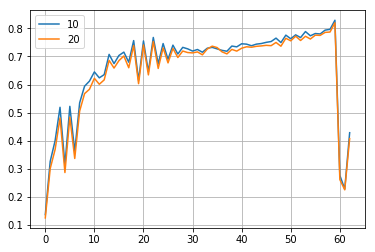

41.8855
40.9818


In [240]:
plt.plot(lc10.sum((0,1)))
plt.plot(lc20.sum((0,1)))
plt.grid(True)
plt.legend(('10', '20'))
plt.show()
print lc10.sum()
print lc20.sum()

#### Evaluate Old Model

*** !!! problem - won't load, something must be imcompatible between versions !!! ***

In [159]:
import eval_curves as ec

In [160]:
tst = ec.calc_eval_curves(checkpoint_folder='/home/ubuntu/loop/checkpoints/vctk-16khz-cmu-no-boundaries-all-noise-2',
                  checkpoint_file='bestmodel.pth',
                     data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                     speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                     speaker_recognition_exp_name='notebook_test',
                     exp_name='vckt_all_original',
                     max_seq_len=1000,
                     nspk=107,
                     gpu=0,
                     batch_size=64,
                     seed=1,
                     eval_epochs=20,
                     b_teacher_force=True,
                     b_use_train_noise=True
                     )

/usr/local/lib/python2.7/dist-packages/torch/backends/cudnn/__init__.py:48: UserWarning: PyTorch was compiled without cuDNN support. To use cuDNN, rebuild PyTorch making sure the library is visible to the build system.
  "PyTorch was compiled without cuDNN support. To use cuDNN, rebuild "
Valid epoch 1:   0%|          | 0/68 [00:00<?, ?it/s]

RuntimeError: The size of tensor a (62) must match the size of tensor b (32) at non-singleton dimension 0